In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c5da3ec0-cb78-4a81-957c-2cbce85afe91',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-23T23:03:01.223Z', 'error_code': 0, 'error_message': None, 'elapsed': 61, 'credit_count': 1, 'notice': None, 'total_count': 9930}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9633, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])

In [4]:
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.910141e+07,1.910141e+07,NaN,1,NaN,NaN,None,2022-07-23T23:02:00.000Z,22472.889154,2.361570e+10,-25.2983,0.990315,-1.144300,5.638120,7.107348,-24.066678,-43.208237,4.292638e+11,41.7063,4.719307e+11,None,2022-07-23T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216703e+08,1.216703e+08,NaN,2,NaN,NaN,None,2022-07-23T23:01:00.000Z,1542.070130,1.474470e+10,-22.8404,1.621492,0.135319,13.871181,35.258746,-22.179228,-47.407217,1.876241e+11,18.2288,1.876241e+11,None,2022-07-23T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
2,825,Tether,USDT,tether,36585,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584128e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-23T23:01:00.000Z,1.000040,4.238351e+10,-18.3778,-0.000285,-0.002028,0.019742,0.083185,0.103893,-0.019817,6.584394e+10,6.3972,6.816973e+10,None,2022-07-23T23:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-23 23:03:02.882222
3,3408,USD Coin,USDC,usd-coin,4937,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.508893e+10,5.508893e+10,NaN,4,NaN,NaN,None,2022-07-23T23:01:00.000Z,1.000006,5.269258e+09,-16.5799,-0.006821,0.001934,0.001173,-0.003279,-0.028634,-0.006604,5.508928e+10,5.3523,5.508928e+10,None,2022-07-23T23:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-23 23:03:02.882222
4,1839,BNB,BNB,bnb,1019,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-23T23:01:00.000Z,259.418218,1.103381e+09,-6.2007,1.467813,-1.731673,3.453302,13.559631,-20.935139,-35.259522,4.185382e+10,4.0664,5.188364e+10,None,2022-07-23T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
5,4687,Binance USD,BUSD,binance-usd,4142,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-23T23:02:00.000Z,1.001336,4.530754e+09,-28.4907,0.231657,0.025051,0.265726,-0.014557,0.120681,0.253266,1.757067e+10,1.7071,1.757067e+10,None,2022-07-23T23:02:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-23 23:03:02.882222
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-23T23:02:00.000Z,0.359427,8.545932e+08,-26.2203,1.259218,-0.108561,2.039831,7.719305,-12.182144,-48.745511,1.737583e+10,1.6882,3.594272e+10,None,2022-07-23T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-07-23T23:01:00.000Z,0.514476,8.002400e+08,1.0439,1.501281,5.973749,12.348910,7.982034,-1.064002,-42.051021,1.736488e+10,1.6871,2.315141e+10,None,2022-07-23T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
8,5426,Solana,SOL,solana,350,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.457619e+08,5.116169e+08,NaN,9,NaN,NaN,

In [5]:
def api_runner(): 
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c5da3ec0-cb78-4a81-957c-2cbce85afe91',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    

In [6]:
import os 
from time import time
from time import sleep 
for i in range (333): 
    api_runner()
    print('Runner completed.')
    sleep(60)
exit()

Runner completed.


KeyboardInterrupt: 

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19101406.00000,19101406.00000,NaN,1,NaN,NaN,None,2022-07-23T23:02:00.000Z,22472.88915,23615698870.32898,-25.29830,0.99031,-1.14430,5.63812,7.10735,-24.06668,-43.20824,429263779720.90350,41.70630,471930672231.09003,None,2022-07-23T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121670300.49900,121670300.49900,NaN,2,NaN,NaN,None,2022-07-23T23:01:00.000Z,1542.07013,14744697367.77125,-22.84040,1.62149,0.13532,13.87118,35.25875,-22.17923,-47.40722,187624136141.94247,18.22880,187624136141.94000,None,2022-07-23T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
2,825,Tether,USDT,tether,36585,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277711.06345,68166976393.25577,NaN,3,NaN,NaN,None,2022-07-23T23:01:00.000Z,1.00004,42383509933.93476,-18.37780,-0.00028,-0.00203,0.01974,0.08318,0.10389,-0.01982,65843936708.79787,6.39720,68169729314.25000,None,2022-07-23T23:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-23 23:03:02.882222
3,3408,USD Coin,USDC,usd-coin,4937,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55088931254.70833,55088931254.70833,NaN,4,NaN,NaN,None,2022-07-23T23:01:00.000Z,1.00001,5269258239.08865,-16.57990,-0.00682,0.00193,0.00117,-0.00328,-0.02863,-0.00660,55089281266.89976,5.35230,55089281266.90000,None,2022-07-23T23:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-23 23:03:02.882222
4,1839,BNB,BNB,bnb,1019,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-23T23:01:00.000Z,259.41822,1103380845.78551,-6.20070,1.46781,-1.73167,3.45330,13.55963,-20.93514,-35.25952,41853824764.74418,4.06640,51883643594.76000,None,2022-07-23T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
5,4687,Binance USD,BUSD,binance-usd,4142,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,None,2022-07-23T23:02:00.000Z,1.00134,4530754306.77599,-28.49070,0.23166,0.02505,0.26573,-0.01456,0.12068,0.25327,17570671119.47191,1.70710,17570671119.47000,None,2022-07-23T23:02:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-23 23:03:02.882222
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-23T23:02:00.000Z,0.35943,854593201.90926,-26.22030,1.25922,-0.10856,2.03983,7.71931,-12.18214,-48.74551,17375826445.43752,1.68820,35942721950.40000,None,2022-07-23T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 23:03:02.882222
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-23T23:01:00.000Z,0.51448,800239995.29232,1.04390,1.50128,5.97375,12.34891,7.98203,-1.06400,-42.05102,17364880644.50126,1.68710,23151414636.25000,None,2022-07-23T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-0

In [9]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.99031,-1.14430,5.63812,7.10735,-24.06668,-43.20824
Ethereum,1.62149,0.13532,13.87118,35.25875,-22.17923,-47.40722
Tether,-0.00028,-0.00203,0.01974,0.08318,0.10389,-0.01982
USD Coin,-0.00682,0.00193,0.00117,-0.00328,-0.02863,-0.00660
BNB,1.46781,-1.73167,3.45330,13.55963,-20.93514,-35.25952
Binance USD,0.23166,0.02505,0.26573,-0.01456,0.12068,0.25327
XRP,1.25922,-0.10856,2.03983,7.71931,-12.18214,-48.74551
Cardano,1.50128,5.97375,12.34891,7.98203,-1.06400,-42.05102
Solana,1.75556,-2.49112,0.69518,5.93694,-19.28440,-59.80975


In [10]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.99031
             quote.USD.percent_change_24h    -1.14430
             quote.USD.percent_change_7d      5.63812
             quote.USD.percent_change_30d     7.10735
             quote.USD.percent_change_60d   -24.06668
             quote.USD.percent_change_90d   -43.20824
Ethereum     quote.USD.percent_change_1h      1.62149
             quote.USD.percent_change_24h     0.13532
             quote.USD.percent_change_7d     13.87118
             quote.USD.percent_change_30d    35.25875
             quote.USD.percent_change_60d   -22.17923
             quote.USD.percent_change_90d   -47.40722
Tether       quote.USD.percent_change_1h     -0.00028
             quote.USD.percent_change_24h    -0.00203
             quote.USD.percent_change_7d      0.01974
             quote.USD.percent_change_30d     0.08318
             quote.USD.percent_change_60d     0.10389
             quote.USD.percent_change_90

In [12]:
df5 = df4.to_frame(name='values')
df5 

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.99031
            quote.USD.percent_change_24h  -1.14430
            quote.USD.percent_change_7d    5.63812
            quote.USD.percent_change_30d   7.10735
            quote.USD.percent_change_60d -24.06668
            quote.USD.percent_change_90d -43.20824
Ethereum    quote.USD.percent_change_1h    1.62149
            quote.USD.percent_change_24h   0.13532
            quote.USD.percent_change_7d   13.87118
            quote.USD.percent_change_30d  35.25875
            quote.USD.percent_change_60d -22.17923
            quote.USD.percent_change_90d -47.40722
Tether      quote.USD.percent_change_1h   -0.00028
            quote.USD.percent_change_24h  -0.00203
            quote.USD.percent_change_7d    0.01974
            quote.USD.percent_change_30d   0.08318
            quote.USD.percent_change_60d   0.10389
            quote.USD.percent_change_90d  -0.01982
USD Coin    quote.USD.percent_change_1h   -0.00682
            quote.USD.percent_change_24h   0.00193
            quote.USD.percent_change_7d    0.00117
            quote.USD.percent_change_30d  -0.00328
            quote.USD.percent_change_60d  -0.02863
            quote.USD.percent_change_90d  -0.00660
BNB         quote.USD.percent_change_1h    1.46781
            quote.USD.percent_change_24h  -1.73167
            quote.USD.percent_change_7d    3.45330
            quote.USD.percent_change_30d  13.55963
            quote.USD.percent_change_60d -20.93514
            quote.USD.percent_change_90d -35.25952
Binance USD quote.USD.percent_change_1h    0.23166
            quote.USD.percent_change_24h   0.02505
            quote.USD.percent_change_7d    0.26573
            quote.USD.percent_change_30d  -0.01456
            quote.USD.percent_change_60d   0.12068
            quote.USD.percent_change_90d   0.25327
XRP         quote.USD.percent_change_1h    1.25922
            quote.USD.percent_change_24h  -0.10856
            quote.USD.percent_change_7d    2.03983
            quote.USD.percent_change_30d   7.71931
            quote.USD.percent_change_60d -12.18214
            quote.USD.percent_change_90d -48.74551
Cardano     quote.USD.percent_change_1h    1.50128
            quote.USD.percent_change_24h   5.97375
            quote.USD.percent_change_7d   12.34891
            quote.USD.percent_change_30d   7.98203
            quote.USD.percent_change_60d  -1.06400
            quote.USD.percent_change_90d -42.05102
Solana      quote.USD.percent_change_1h    1.75556
            quote.USD.percent_change_24h  -2.49112
            quote.USD.percent_change_7d    0.69518
            quote.USD.percent_change_30d   5.93694
            quote.USD.percent_change_60d -19.28440
            quote.USD.percent_change_90d -59.80975
Dogecoin    quote.USD.percent_change_1h    1.13174
            quote.USD.percent_change_24h   0.35329
            quote.USD.percent_change_7d    5.59203
            quote.USD.percent_change_30d   6.46757
            quote.USD.percent_change_60d -18.40269
            quote.USD.percent_change_90d -48.55034
Dai         quote.USD.percent_change_1h    0.04028
            quote.USD.percent_change_24h   0.00460
            quote.USD.percent_change_7d    0.00361
            quote.USD.percent_change_30d   0.03614
            quote.USD.percent_change_60d  -0.07688
            quote.USD.percent_change_90d   0.08852
Polkadot    quote.USD.percent_change_1h    1.25872
            quote.USD.percent_change_24h  -0.30545
            quote.USD.percent_change_7d    2.09676
            quote.USD.percent_change_30d  -4.63085
            quote.USD.percent_change_60d -27.76747
            quote.USD.percent_change_90d -59.80546
Polygon     quote.USD.percent_change_1h    3.32579
            quote.USD.percent_change_24h   0.35775
            quote.USD.percent_change_7d   19.39134
            quote.USD.percent_change_30d  56.01414
            quote.USD.percent_change_60d  30.83212
            quo

In [13]:
df5.count()

values    90
dtype: int64

In [14]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.99031
1,Bitcoin,quote.USD.percent_change_24h,-1.14430
2,Bitcoin,quote.USD.percent_change_7d,5.63812
3,Bitcoin,quote.USD.percent_change_30d,7.10735
4,Bitcoin,quote.USD.percent_change_60d,-24.06668
5,Bitcoin,quote.USD.percent_change_90d,-43.20824
6,Ethereum,quote.USD.percent_change_1h,1.62149
7,Ethereum,quote.USD.percent_change_24h,0.13532
8,Ethereum,quote.USD.percent_change_7d,13.87118
9,Ethereum,quote.USD.percent_change_30d,35.25875


In [15]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.99031
1,Bitcoin,quote.USD.percent_change_24h,-1.14430
2,Bitcoin,quote.USD.percent_change_7d,5.63812
3,Bitcoin,quote.USD.percent_change_30d,7.10735
4,Bitcoin,quote.USD.percent_change_60d,-24.06668
5,Bitcoin,quote.USD.percent_change_90d,-43.20824
6,Ethereum,quote.USD.percent_change_1h,1.62149
7,Ethereum,quote.USD.percent_change_24h,0.13532
8,Ethereum,quote.USD.percent_change_7d,13.87118
9,Ethereum,quote.USD.percent_change_30d,35.25875


In [16]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.99031
1,Bitcoin,24h,-1.14430
2,Bitcoin,7d,5.63812
3,Bitcoin,30d,7.10735
4,Bitcoin,60d,-24.06668
5,Bitcoin,90d,-43.20824
6,Ethereum,1h,1.62149
7,Ethereum,24h,0.13532
8,Ethereum,7d,13.87118
9,Ethereum,30d,35.25875


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

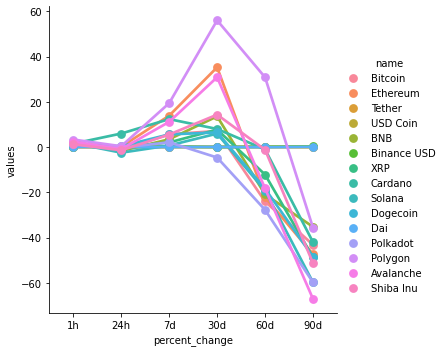

In [18]:
sns.catplot(x='percent_change', y = 'values', hue='name', data = df7, kind = 'point')

In [19]:
df12 = df.groupby('name', sort=False)[['quote.USD.fully_diluted_market_cap']].mean()
df12

,quote.USD.fully_diluted_market_cap
name,
Bitcoin,471930672231.09003
Ethereum,187624136141.94000
Tether,68169729314.25000
USD Coin,55089281266.90000
BNB,51883643594.76000
Binance USD,17570671119.47000
XRP,35942721950.40000
Cardano,23151414636.25000
Solana,20472188903.71000


In [20]:
df13 = df12.stack()
df13

name                                           
Bitcoin      quote.USD.fully_diluted_market_cap   471930672231.09003
Ethereum     quote.USD.fully_diluted_market_cap   187624136141.94000
Tether       quote.USD.fully_diluted_market_cap    68169729314.25000
USD Coin     quote.USD.fully_diluted_market_cap    55089281266.90000
BNB          quote.USD.fully_diluted_market_cap    51883643594.76000
Binance USD  quote.USD.fully_diluted_market_cap    17570671119.47000
XRP          quote.USD.fully_diluted_market_cap    35942721950.40000
Cardano      quote.USD.fully_diluted_market_cap    23151414636.25000
Solana       quote.USD.fully_diluted_market_cap    20472188903.71000
Dogecoin     quote.USD.fully_diluted_market_cap     9025229081.80000
Dai          quote.USD.fully_diluted_market_cap     7385606513.11000
Polkadot     quote.USD.fully_diluted_market_cap     8102888544.49000
Polygon      quote.USD.fully_diluted_market_cap     8666136022.46000
Avalanche    quote.USD.fully_diluted_market_cap    1705

In [21]:
df14 = df13.to_frame(name='values')
df14 

,,values
name,,
Bitcoin,quote.USD.fully_diluted_market_cap,471930672231.09003
Ethereum,quote.USD.fully_diluted_market_cap,187624136141.94000
Tether,quote.USD.fully_diluted_market_cap,68169729314.25000
USD Coin,quote.USD.fully_diluted_market_cap,55089281266.90000
BNB,quote.USD.fully_diluted_market_cap,51883643594.76000
Binance USD,quote.USD.fully_diluted_market_cap,17570671119.47000
XRP,quote.USD.fully_diluted_market_cap,35942721950.40000
Cardano,quote.USD.fully_diluted_market_cap,23151414636.25000
Solana,quote.USD.fully_diluted_market_cap,20472188903.71000


In [22]:
df15 = df14.reset_index()
df15

,name,level_1,values
0,Bitcoin,quote.USD.fully_diluted_market_cap,471930672231.09003
1,Ethereum,quote.USD.fully_diluted_market_cap,187624136141.94000
2,Tether,quote.USD.fully_diluted_market_cap,68169729314.25000
3,USD Coin,quote.USD.fully_diluted_market_cap,55089281266.90000
4,BNB,quote.USD.fully_diluted_market_cap,51883643594.76000
5,Binance USD,quote.USD.fully_diluted_market_cap,17570671119.47000
6,XRP,quote.USD.fully_diluted_market_cap,35942721950.40000
7,Cardano,quote.USD.fully_diluted_market_cap,23151414636.25000
8,Solana,quote.USD.fully_diluted_market_cap,20472188903.71000
9,Dogecoin,quote.USD.fully_diluted_market_cap,9025229081.80000


In [23]:
df16 = df15.rename(columns = {'level_1': 'market_cap'})
df16

,name,market_cap,values
0,Bitcoin,quote.USD.fully_diluted_market_cap,471930672231.09003
1,Ethereum,quote.USD.fully_diluted_market_cap,187624136141.94000
2,Tether,quote.USD.fully_diluted_market_cap,68169729314.25000
3,USD Coin,quote.USD.fully_diluted_market_cap,55089281266.90000
4,BNB,quote.USD.fully_diluted_market_cap,51883643594.76000
5,Binance USD,quote.USD.fully_diluted_market_cap,17570671119.47000
6,XRP,quote.USD.fully_diluted_market_cap,35942721950.40000
7,Cardano,quote.USD.fully_diluted_market_cap,23151414636.25000
8,Solana,quote.USD.fully_diluted_market_cap,20472188903.71000
9,Dogecoin,quote.USD.fully_diluted_market_cap,9025229081.80000


<AxesSubplot:xlabel='name'>

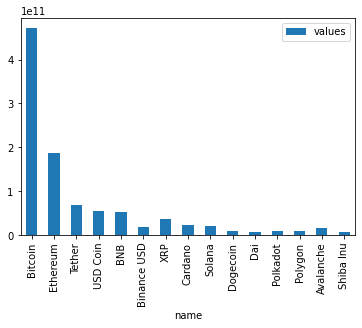

In [25]:
#sns.catplot(x='market_cap', y = 'values', hue='name', data = df16, kind = 'point')
df16.plot.bar(x='name', y = 'values')